### CPU Geekbench Analysis

In [1]:
### import neccesary libraries


import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cpu_stat = pd.read_csv(r'C:\Users\sadeo\Desktop\Smartphone benchmark\smartphone_cpu_stats.csv')
cpu_stat.head()

,rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,(2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,(1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,(1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,(2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,(1+3+4),2995,Adreno 660


In [5]:
cpu_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             125 non-null    int64 
 1   company          125 non-null    object
 2   cpuName          125 non-null    object
 3   geekbenchSingle  125 non-null    int64 
 4   geekbenchMulti   125 non-null    int64 
 5   antutu9          125 non-null    int64 
 6   coreCount        125 non-null    int64 
 7   coreConfig       125 non-null    object
 8   clockSpeed       125 non-null    int64 
 9   gpu              125 non-null    object
dtypes: int64(6), object(4)
memory usage: 9.9+ KB


In [4]:
list(set(cpu_stat.company))

['Samsung', 'Google', 'HiSilicon', 'Qualcomm', 'Unisoc', 'MediaTek', 'Apple']

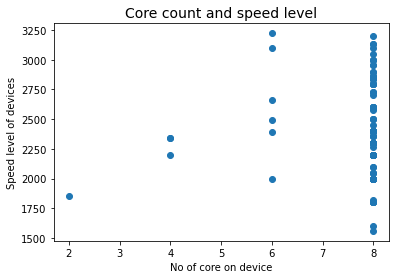

In [17]:
### Relationship between core and speed

plt.scatter(cpu_stat.coreCount, cpu_stat.clockSpeed)
plt.title('Core count and speed level', size=14)
plt.ylabel('Speed level of devices')
plt.xlabel('No of core on device')

plt.show()

In [12]:
company_benchmark = cpu_stat.groupby(['company']).mean()
company_benchmark

,rank,geekbenchSingle,geekbenchMulti,antutu9,coreCount,clockSpeed
company,,,,,,
Apple,35.285714,1137.571429,2838.857143,505852.142857,5.142857,2579.000000
Google,9.000000,1038.000000,2845.000000,717527.000000,8.000000,2800.000000
HiSilicon,65.875000,550.875000,2049.437500,366704.687500,8.000000,2510.625000
MediaTek,65.757576,507.696970,1833.909091,350337.181818,8.000000,2265.151515
Qualcomm,59.547619,574.571429,1967.761905,386756.023810,7.809524,2376.833333
Samsung,67.714286,553.190476,1757.428571,357128.619048,7.904762,2343.809524
Unisoc,94.400000,356.200000,1298.200000,212928.600000,8.000000,1844.000000


In [13]:
fastest = company_benchmark.nlargest(7,'clockSpeed')
highest_single = company_benchmark.nlargest(7,'geekbenchSingle')
highest_multiple = company_benchmark.nlargest(7,'geekbenchMulti')
high_antutu9 = company_benchmark.nlargest(7,'antutu9')

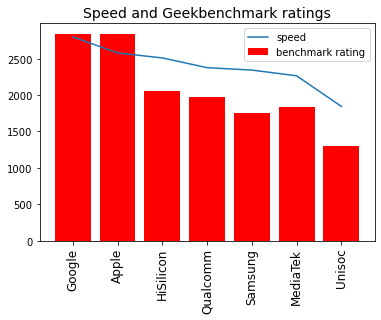

In [23]:
plt.plot(fastest.index, fastest.clockSpeed)
plt.bar(highest_multiple.index, highest_multiple.geekbenchMulti, color='r')
plt.title('Speed and Geekbenchmark ratings', size=14)
plt.xticks(rotation='vertical', size=12)
plt.legend(['speed', 'benchmark rating'])

plt.show()